In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append(r'C:\pythonprojects\statistics\venv\Lib\site-packages')
sys.path.append("C:/pythonprojects/statistics/utils.py")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import utils
import ipywidgets as widgets
from ipywidgets import interact_manual, fixed

In [3]:
df = pd.read_csv("C:/Users/ashok/Downloads/world_happiness.csv")
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [4]:
df = df.rename(columns={i:'_'.join(i.split(' ')).lower() for i in df.columns})
df.head(5)


,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [5]:
df = df.dropna() #dropping the null values
df.head()


,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [6]:
df.isnull().sum()

country_name                        0
year                                0
life_ladder                         0
log_gdp_per_capita                  0
social_support                      0
healthy_life_expectancy_at_birth    0
freedom_to_make_life_choices        0
generosity                          0
perceptions_of_corruption           0
positive_affect                     0
negative_affect                     0
dtype: int64

In [7]:
X = df[['log_gdp_per_capita']]  #this is one of our independent variable and capital X denotes that X is 2-dimensional
y = df[['life_ladder']]
y

,life_ladder
0,3.724
1,4.402
2,4.758
3,3.832
4,3.783
...,...
2194,3.616
2195,2.694
2196,3.160
2197,3.155


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42) #here the test size is 20 % and the training size is 80% of the total data
X_train.values

array([[ 9.884],
       [10.594],
       [ 8.521],
       ...,
       [10.635],
       [10.424],
       [10.006]], shape=(1566, 1))

In [9]:
y_train.values

array([[5.383],
       [6.027],
       [4.483],
       ...,
       [6.199],
       [6.183],
       [6.174]], shape=(1566, 1))

In [10]:
lr = LinearRegression().fit(X_train,y_train)  #training the model
lr

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
w = lr.coef_
b = lr.intercept_
print(f'The paramters of the model are: w:{w} and b:{b}')


The paramters of the model are: w:[[0.77816718]] and b:[-1.81350238]


In [12]:
#NOW TIME FOR PREDICTION
#using the model predict function
Y_pred = lr.predict(X_test)

In [13]:
#using the parameters of the trained model
Y_prediction = np.dot(X_test,w) + b


In [14]:
print(f'The prediction done through parameters use and predict method is same: {(Y_prediction == Y_pred).all()}')

The prediction done through parameters use and predict method is same: True


In [15]:
print('The target values are:\n',y_test[:4])

The target values are:
       life_ladder
1217        4.016
625         7.393
492         6.500
422         4.510


In [16]:
print('The predicted values are\n',Y_prediction[:4])

The predicted values are
 [[4.14336741]
 [6.53934416]
 [6.30511584]
 [4.80247501]]


In [17]:
loss_error = metrics.mean_absolute_error(y_test,Y_prediction)  #calculating the loss error
print(f'The mean absolute error is:', loss_error)

The mean absolute error is: 0.5659199906677539


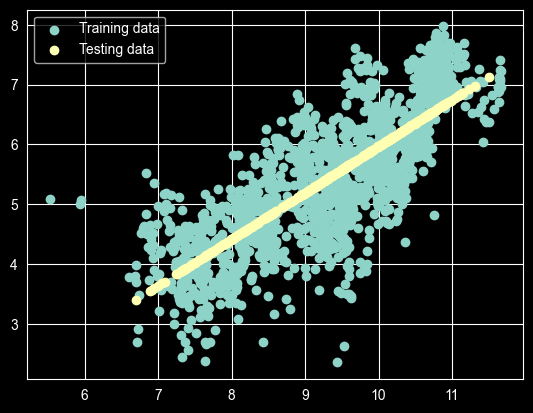

In [18]:
#now visualizing the training data
plt.figure()
plt.scatter(X_train,y_train,label='Training data')
#visualizing the testing x variable and predicted y variable
plt.scatter(X_test,Y_prediction,label='Testing data')  
plt.legend()

In [19]:
def fit_and_plot_linear_model(data, features):
    features = list(features)
    y = data['life_ladder']
    X = data[features]
    # Creating a train-test split for each feature values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    # training the linear regression model
    lr = LinearRegression().fit(X_train, y_train)

    # Calculate the feature imporance 
    most_important, feature_importance_df = utils.calculate_feature_importance(features, lr, X_test, y_test)  

    # Preparing the data for plotting
    X_plot = data[most_important]
    Y_real = data["life_ladder"]
    X_test_plot = X_test[most_important]
    y_test_preds = lr.predict(X_test)
    
    # Plot the data and the model
    utils.plot_happiness(most_important, X_plot, Y_real, X_test_plot, y_test_preds)

    # Creating a plot of feature imporance if there is more than one feature
    if feature_importance_df is not None:
        utils.plot_feature_importance(feature_importance_df)
    
    # Calculate and print out the mean absolute error
    mae = metrics.mean_absolute_error(y_test, y_test_preds)
    print(f"Mean Absolute Error: {mae:.2f}\n")


In [20]:
# Listing of all possible predictor variables
predictors = ['year', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'positive_affect', 'negative_affect']

# Widget for feature selection
feature_selection = widgets.SelectMultiple(
    options=predictors, value=predictors,
    description="Features", disabled=False,
)

# Interactive call to the function
interact_manual(fit_and_plot_linear_model, data=fixed(df), features=feature_selection);

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8), options=('year…